# ER NETWORK

In [35]:
from To_sim.for_multi import get_r_sigma_Z
import numpy as np


from To_sim.for_multi import get_r_sigma_Z_MF
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt

import scipy.ndimage


N = 1000
omega = 1



In [18]:
# 초기 네트워크 생성 파라미터 설정
num_nodes = 1000
p = 6 / (num_nodes - 1)

def generate_network(num_nodes, p):
    while True:
        # ER 네트워크 생성
        G = nx.erdos_renyi_graph(num_nodes, p)
        
        # 외부 링크가 없는 노드 제거
        G.remove_nodes_from(list(nx.isolates(G)))
        
        # 노드 수가 1000개가 되면 종료
        if len(G.nodes()) == num_nodes:
            break
    
    return G

# 네트워크 생성
G = generate_network(num_nodes, p)

In [19]:
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

6.11


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_24360/3818068186.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [2]:
K = 5
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)

In [4]:
seed =0 

db = 0.04
Ds = np.linspace(0,K*0.8,41)
bs = np.arange(0,1+0.1*K+db/2,db*2)
len(Ds), len(bs)

(41, 19)

In [ ]:
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()

np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)

th = len(t)//2
D_rij = []
D_sigmaij = []
D_chiij = []
for D in tqdm(Ds):
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=10):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    D_rij.append(D_rs)
    D_sigmaij.append(D_sigmas)
    D_chiij.append(D_chis)      

D_rij = np.array(D_rij)
D_sigmaij = np.array(D_sigmaij)
D_chiij = np.array(D_chiij)
np.savez(f'DATA/ER N = {N} mk = {mk} db={db} K = {K} {seed:03d}',Ds=Ds,bs=bs,D_mrij=D_rij,D_sij = D_sigmaij,D_chiij=D_chiij,G = G)
CS  = plt.pcolormesh(Ds,bs,abs(D_chiij).T)
plt.show()

# SF DATA

In [8]:
m = 3
G = nx.barabasi_albert_graph(N,m)
A = nx.adjacency_matrix(G)
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

5.982


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_27049/1112736287.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [11]:
np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)
print(seed)

0


  0%|          | 0/41 [00:00<?, ?it/s]

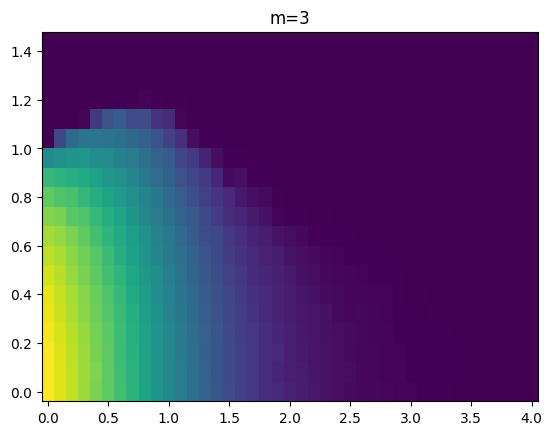

In [12]:
th = len(t)//2

D_rij = []
D_sigmaij = []
D_chiij = []
for D in tqdm(Ds):
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=8):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    D_rij.append(D_rs)
    D_sigmaij.append(D_sigmas)
    D_chiij.append(D_chis)

D_rij = np.array(D_rij)
D_sigmaij = np.array(D_sigmaij)
D_chiij = np.array(D_chiij)
np.savez(f'DATA/SF N = {N} m = {m} db={db} {seed:03d}',Ds=Ds,bs=bs,D_mrij=D_rij,D_sij = D_sigmaij,D_chiij=D_chiij,G = G)
CS  = plt.pcolormesh(Ds,bs,abs(D_chiij).T)
plt.title(f'm={m}')
plt.show()

(0.0, 3.0)

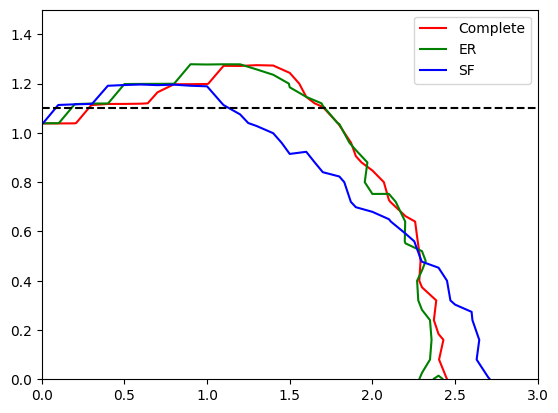

In [142]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')

cs_mf = plt.contour(AR_MF['Ds'],AR_MF['bs'],AR_MF['D_chiij'].T,levels=[10],colors='red')
h_mf,_ = cs_mf.legend_elements()

AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')


cs_er = plt.contour(AR_ER['Ds'],AR_ER['bs'],AR_ER['D_chiij'].T,levels=[5],colors='green')
h_er,_ = cs_er.legend_elements()


AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')
cs_sf = plt.contour(AR_SF['Ds'],AR_SF['bs'],AR_SF['D_chiij'].T,levels=[20],colors='blue')
h_sf,_ = cs_sf.legend_elements()

plt.legend([h_mf[0],h_er[0],h_sf[0]],['Complete','ER','SF'])
plt.hlines(1.1,0,3.0,ls='--',color='black')
plt.ylim(0,1.5)
plt.xlim(0,3)

In [126]:
DATA_GRAPH = []

In [140]:
num = 0

0.08


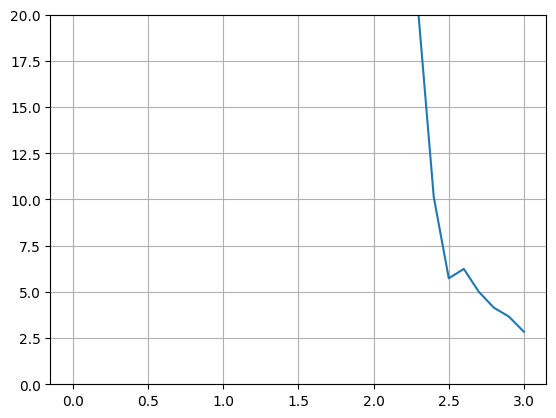

In [141]:
ORI = AR_MF
AAAA = (ORI['D_mrij'] - ORI['D_sij']).T
# for A,b in zip(ORI['D_chiij'].T,ORI['bs']):
for i,(A,b) in enumerate(list(zip(ORI['D_chiij'].T,ORI['bs']))):
    # np.where(A>2,A,np.nan)
    # A = np.where(A>2,A,np.nan)
    if num < i : 
        plt.plot(ORI['Ds'],A)
        print(b)
        num +=1
        break
plt.ylim(0,20)
plt.grid()

In [ ]:
DATA_GRAPH.append((0.8,2.5))


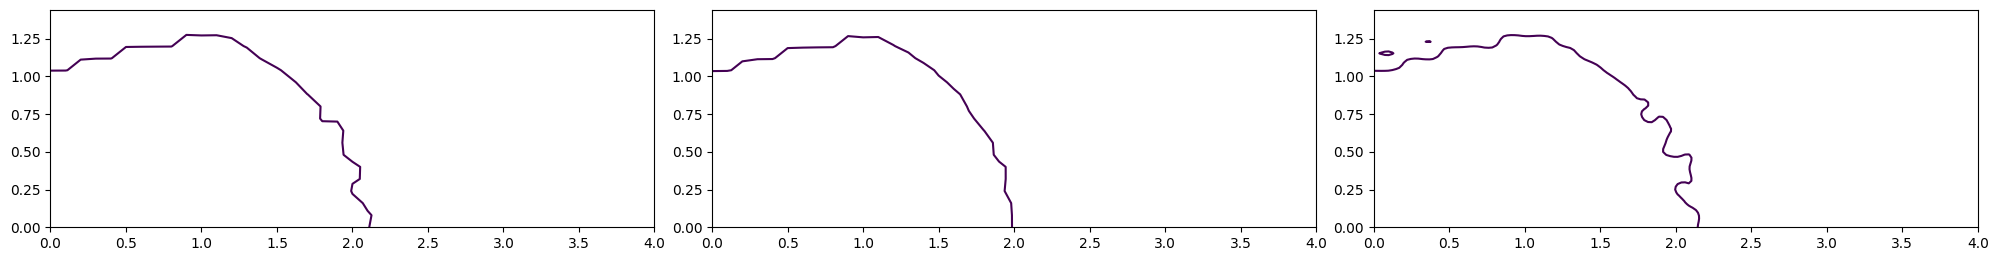

In [105]:
from scipy.ndimage import gaussian_filter
sigma = 0.2 # this depends on how noisy your data is, play with it!
ORI = AR_ER
ori = AR_ER['D_chiij'].T
data = gaussian_filter(ori, sigma)
data1 = gaussian_filter(ori, 1.3)

plt.figure(figsize=(20,5))
# plt.contour(data)
plt.subplot(131)
A = plt.contour(ORI['Ds'],ORI['bs'],ori,origin='lower',levels=[14])
# plt.colorbar(A,shrink=0.3)
plt.gca().set_aspect(1)

plt.subplot(132)
B = plt.contour(ORI['Ds'],ORI['bs'],data,origin='lower',levels=[30])
# plt.colorbar(B,shrink=0.3)
plt.gca().set_aspect(1)

plt.subplot(133)
plt.gca().set_aspect(1)
D_MF = scipy.ndimage.zoom(ORI['D_chiij'].T, 4)
b_l,D_l = D_MF.shape
D_a,D_b = ORI['Ds'][0],ORI['Ds'][-1]
b_a,b_b = ORI['bs'][0],ORI['bs'][-1]
DD = np.linspace(D_a,D_b,D_l)
BB = np.linspace(b_a,b_b,b_l)

C = plt.contour(DD,BB,D_MF,origin='lower',levels=[12])


# plt.colorbar(C,shrink=0.3)
plt.tight_layout()

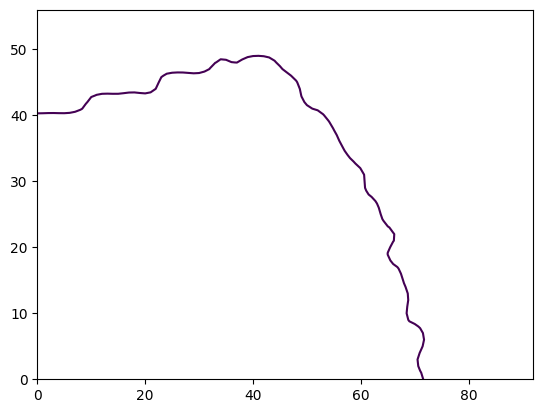

In [45]:
AR_MF = np.load('DATA/MF N = 1000 db=0.04 K = 5 000.npz')

D_MF = scipy.ndimage.zoom(AR_MF['D_chiij'], 3)
# cs_mf = plt.contour(AR_MF['Ds'],AR_MF['bs'],AR_MF['D_chiij'].T,levels=[10],colors='red')
# cs_mf = plt.contour(AR_MF['Ds'],AR_MF['bs'],D_MF,levels=[10],colors='red')
# h_mf,_ = cs_mf.legend_elements()
plt.contour(D_MF.T,levels=[20])

# AR_ER = np.load('DATA/ER N = 1000 mk = 6.0 db=0.04 K = 5 000.npz')


# cs_er = plt.contour(AR_ER['Ds'],AR_ER['bs'],AR_ER['D_chiij'].T,levels=[5],colors='green')
# h_er,_ = cs_er.legend_elements()


# AR_SF = np.load('DATA/SF N = 1000 m = 3 db=0.04 000.npz')
# cs_sf = plt.contour(AR_SF['Ds'],AR_SF['bs'],AR_SF['D_chiij'].T,levels=[20],colors='blue')
# h_sf,_ = cs_sf.legend_elements()

# plt.legend([h_mf[0],h_er[0],h_sf[0]],['Complete','ER','SF'])

# plt.

# Transition point check

In [143]:
from To_sim.for_multi import get_r_sigma_Z_MF
import numpy as np
import parmap
from tqdm.notebook import tqdm
import networkx as nx
import matplotlib.pyplot as plt
N = 1000
omega = 1

In [395]:
EDM_SET = {}

In [700]:
D = 0.0

In [806]:
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)
K = 5
db = 0.04
# Ds = np.linspace(0,K*0.6,31)
# len(Ds), len(bs)
bs = np.linspace(0.0,0.2,11)

In [815]:
D = 2.5

In [808]:
print(D)

2.45


In [775]:
D += 0.3
print(D)

2.4


In [816]:
seed = 1
np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)
D_rs = []
D_sigmas = []    
D_chis = []
for r_m,sigma,chi in parmap.map(get_r_sigma_Z_MF,bs,theta_random,t,D,omega,N,K,pm_pbar=False, pm_processes=8):
    D_rs.append(r_m)
    D_sigmas.append(sigma)
    D_chis.append(chi)


Text(0.5, 1.0, '2.5')

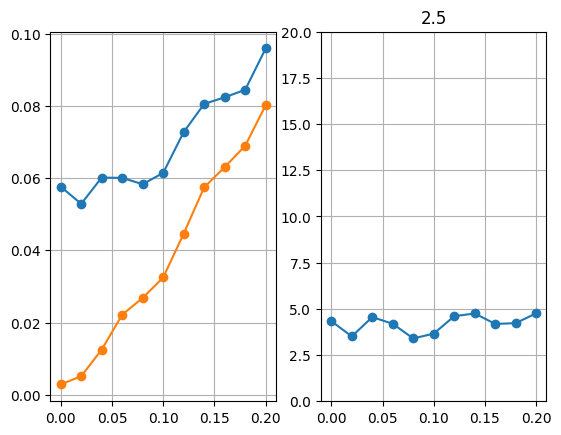

In [817]:
plt.subplot(121)
plt.plot(bs,D_rs,'o-')
plt.plot(bs,D_sigmas,'o-')
plt.grid()
plt.subplot(122)
plt.plot(bs,D_chis,'o-')
plt.grid()

plt.ylim(0,20)
plt.title(D)

In [761]:
EDM_SET[D,'t_b']  = 1.06

In [726]:
bs

array([1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ])

In [818]:
ED_rs = []
ED_sigmas  = []
ED_chi = []
for seed in tqdm(range(10)):
    np.random.seed(seed)
    theta_random = np.random.uniform(0,2*np.pi,N)
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z_MF,bs,theta_random,t,D,omega,N,K,pm_pbar=False, pm_processes=8):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    ED_chi.append(D_chis)
    ED_rs.append(D_rs)
    ED_sigmas.append(D_sigmas)

  0%|          | 0/10 [00:00<?, ?it/s]

In [819]:
EDM_C = np.mean(ED_chi,axis=0)
EDM_CS = np.std(ED_chi,axis=0)
EDM_R = np.mean(ED_rs,axis=0)
EDM_RS = np.std(ED_rs,axis=0)
EDM_S = np.mean(ED_sigmas,axis=0)
EDM_SS = np.std(ED_sigmas,axis=0)

EDM_SET[D,'m_chi'] = EDM_C
EDM_SET[D,'s_chi'] = EDM_CS
EDM_SET[D,'m_rs']  = EDM_R
EDM_SET[D,'s_rs']  = EDM_RS
EDM_SET[D,'m_ss']  = EDM_S
EDM_SET[D,'s_ss']  = EDM_SS
EDM_SET[D,'bs']  = bs

In [821]:
EDM_SET[D,'t_b']  = 0.0

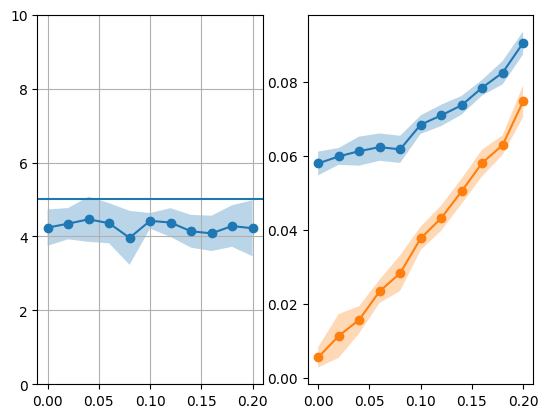

In [820]:
plt.subplot(121)
plt.plot(bs,EDM_SET[D,'m_chi'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_chi']-EDM_SET[D,'s_chi'],EDM_SET[D,'m_chi']+EDM_SET[D,'s_chi'],alpha=0.3)
plt.ylim(0,10)
plt.axhline(5)
plt.grid()
plt.subplot(122)
plt.plot(bs,EDM_SET[D,'m_rs'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_rs']-EDM_SET[D,'s_rs'],EDM_SET[D,'m_rs']+EDM_SET[D,'s_rs'],alpha=0.3)
plt.plot(bs,EDM_SET[D,'m_ss'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_ss']-EDM_SET[D,'s_ss'],EDM_SET[D,'m_ss']+EDM_SET[D,'s_ss'],alpha=0.3)

In [388]:
EDM_SET.keys()

dict_keys([(0.0, 'm_chi'), (0.0, 's_chi'), (0.0, 'm_rs'), (0.0, 's_rs'), (0.0, 'm_ss'), (0.0, 's_ss'), (0.0, 'bs'), (0.0, 't_b'), (0.1, 't_b'), (0.1, 'm_chi'), (0.1, 's_chi'), (0.1, 'm_rs'), (0.1, 's_rs'), (0.1, 'm_ss'), (0.1, 's_ss'), (0.1, 'bs'), (0.2, 'm_chi'), (0.2, 's_chi'), (0.2, 'm_rs'), (0.2, 's_rs'), (0.2, 'm_ss'), (0.2, 's_ss'), (0.2, 'bs'), (0.2, 't_b'), (0.3, 'm_chi'), (0.3, 's_chi'), (0.3, 'm_rs'), (0.3, 's_rs'), (0.3, 'm_ss'), (0.3, 's_ss'), (0.3, 'bs'), (0.3, 't_b'), (0.4, 'm_chi'), (0.4, 's_chi'), (0.4, 'm_rs'), (0.4, 's_rs'), (0.4, 'm_ss'), (0.4, 's_ss'), (0.4, 'bs'), (0.4, 't_b'), (0.5, 't_b'), (0.7, 'm_chi'), (0.7, 's_chi'), (0.7, 'm_rs'), (0.7, 's_rs'), (0.7, 'm_ss'), (0.7, 's_ss'), (0.7, 'bs'), (0.7, 't_b'), (0.8, 't_b'), (0.9, 'm_chi'), (0.9, 's_chi'), (0.9, 'm_rs'), (0.9, 's_rs'), (0.9, 'm_ss'), (0.9, 's_ss'), (0.9, 'bs'), (0.9, 't_b'), (1.0, 'm_chi'), (1.0, 's_chi'), (1.0, 'm_rs'), (1.0, 's_rs'), (1.0, 'm_ss'), (1.0, 's_ss'), (1.0, 'bs'), (1.0, 't_b'), (1.2, 'm_

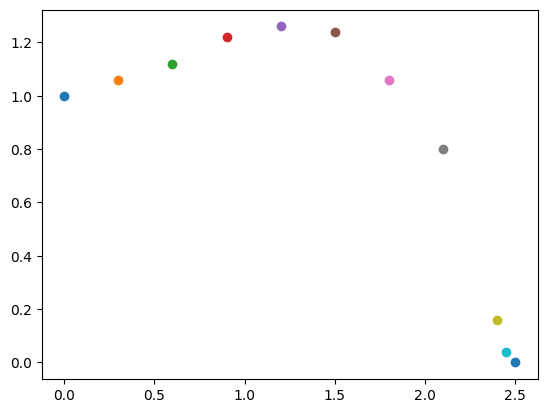

In [822]:
Ds = []
SS = []
for (D,_) in EDM_SET.keys():
    if _ == 't_b':
        plt.scatter(D,EDM_SET[D,_])
        Ds.append(D)
        SS.append(EDM_SET[D,_])
        print()
Ds = np.array(Ds)
SS = np.array(SS)
arg_Ds = np.argsort(Ds)[::-1]
SS = SS[arg_Ds]
Ds = Ds[arg_Ds]

(0.0, 3.0)

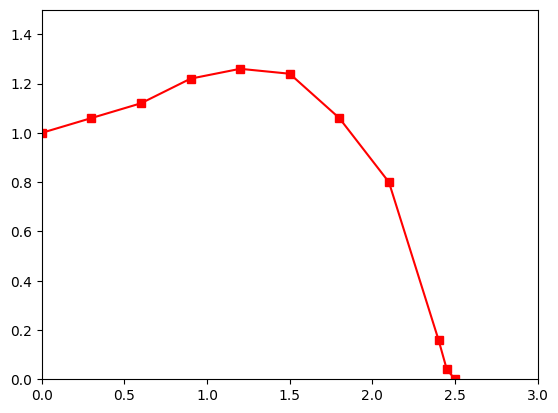

In [825]:
plt.plot(Ds,SS,'rs-')
plt.ylim(0,1.5)
plt.xlim(0,3)


In [824]:
np.savez('DATA/MF_threshold',Ds=Ds,bs = SS)

In [ ]:
for Ds in

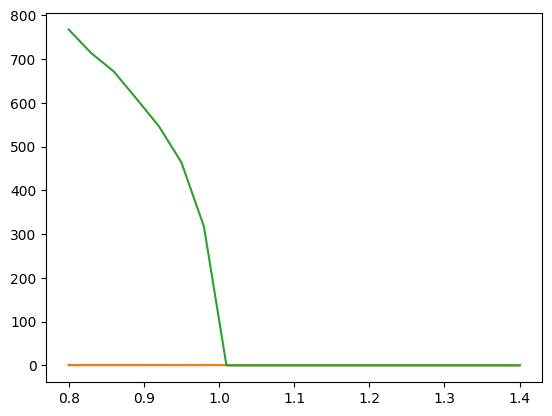

In [154]:
plt.plot(bs,D_rs)
plt.plot(bs,D_sigmas)
plt.plot(bs,D_chis)


In [ ]:

for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=False, pm_processes=10):

# ER NETWORK THRESHOLD

In [550]:
# 초기 네트워크 생성 파라미터 설정
num_nodes = 1000
p = 6 / (num_nodes - 1)

def generate_network(num_nodes, p):
    while True:
        # ER 네트워크 생성
        G = nx.erdos_renyi_graph(num_nodes, p)
        
        # 외부 링크가 없는 노드 제거
        G.remove_nodes_from(list(nx.isolates(G)))
        
        # 노드 수가 1000개가 되면 종료
        if len(G.nodes()) == num_nodes:
            break
    
    return G

# 네트워크 생성
Gs = []
for i in range(10):
    G = generate_network(num_nodes, p)
    Gs.append(G)

In [552]:
A = nx.adjacency_matrix(Gs[0])
Aij = A.todense()
Deg = Aij.sum(axis=1)
DegT = Deg.reshape(-1,1)
mk = Deg.mean()
print(mk)

6.09


/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_46257/656577331.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(Gs[0])


In [553]:
EDM_SET = {}

In [ ]:
D = 0.0

In [687]:
t_end = 200
dt = 0.1
t = np.arange(0, t_end+dt/2, dt)
K = 5
db = 0.04
# Ds = np.linspace(0,K*0.6,31)
# len(Ds), len(bs)
bs = np.linspace(0.4,0.5,6)

In [685]:
D = 2.4

In [688]:
print(D)

2.4


In [617]:
D += 0.3
print(D)

2.1


In [689]:
seed = 0
np.random.seed(seed)
theta_random = np.random.uniform(0,2*np.pi,N)
D_rs = []
D_sigmas = []    
D_chis = []
for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=True, pm_processes=8):
    D_rs.append(r_m)
    D_sigmas.append(sigma)
    D_chis.append(chi)


  0%|          | 0/6 [00:00<?, ?it/s]

Text(0.5, 1.0, '2.4')

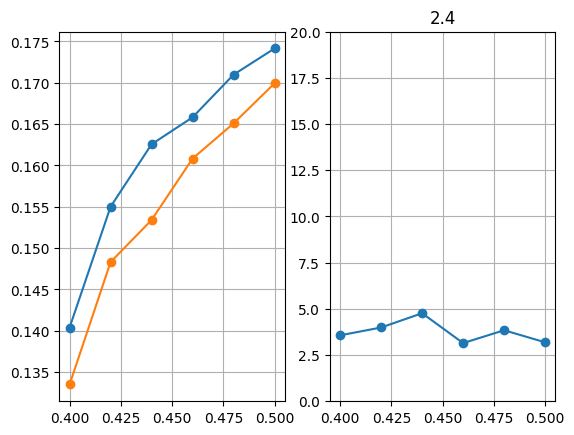

In [690]:
plt.subplot(121)
plt.plot(bs,D_rs,'o-')
plt.plot(bs,D_sigmas,'o-')
plt.grid()
plt.subplot(122)
plt.plot(bs,D_chis,'o-')
plt.grid()

plt.ylim(0,20)
plt.title(D)

In [683]:
EDM_SET[D,'t_b']  = 0

In [647]:
Ds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. ])

In [ ]:
ED_rs = []
ED_sigmas  = []
ED_chi = []
for seed in tqdm(range(10)):
    np.random.seed(seed)
    theta_random = np.random.uniform(0,2*np.pi,N)
    D_rs = []
    D_sigmas = []    
    D_chis = []
    for r_m,sigma,chi in parmap.map(get_r_sigma_Z,bs,theta_random,t,D,omega,N,K,mk,Aij,pm_pbar=True, pm_processes=8):
        D_rs.append(r_m)
        D_sigmas.append(sigma)
        D_chis.append(chi)
    ED_chi.append(D_chis)
    ED_rs.append(D_rs)
    ED_sigmas.append(D_sigmas)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
EDM_C = np.mean(ED_chi,axis=0)
EDM_CS = np.std(ED_chi,axis=0)
EDM_R = np.mean(ED_rs,axis=0)
EDM_RS = np.std(ED_rs,axis=0)
EDM_S = np.mean(ED_sigmas,axis=0)
EDM_SS = np.std(ED_sigmas,axis=0)

EDM_SET[D,'m_chi'] = EDM_C
EDM_SET[D,'s_chi'] = EDM_CS
EDM_SET[D,'m_rs']  = EDM_R
EDM_SET[D,'s_rs']  = EDM_RS
EDM_SET[D,'m_ss']  = EDM_S
EDM_SET[D,'s_ss']  = EDM_SS
EDM_SET[D,'bs']  = bs

In [693]:
EDM_SET[2.45,'t_b']  = 0.3

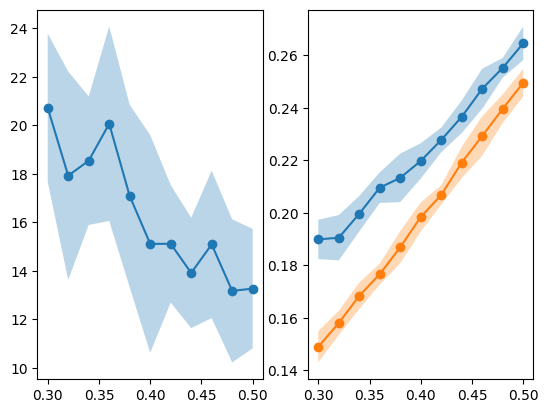

In [ ]:
plt.subplot(121)
plt.plot(bs,EDM_SET[D,'m_chi'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_chi']-EDM_SET[D,'s_chi'],EDM_SET[D,'m_chi']+EDM_SET[D,'s_chi'],alpha=0.3)
# plt.ylim(0,10)
plt.subplot(122)
plt.plot(bs,EDM_SET[D,'m_rs'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_rs']-EDM_SET[D,'s_rs'],EDM_SET[D,'m_rs']+EDM_SET[D,'s_rs'],alpha=0.3)
plt.plot(bs,EDM_SET[D,'m_ss'],'o-')
plt.fill_between(bs,EDM_SET[D,'m_ss']-EDM_SET[D,'s_ss'],EDM_SET[D,'m_ss']+EDM_SET[D,'s_ss'],alpha=0.3)












[0.   0.3  0.5  0.72 0.92 1.08 1.26 1.22 1.16 1.08 1.  ]
[2.5  2.45 2.4  2.1  1.8  1.5  1.2  0.9  0.6  0.3  0.  ]


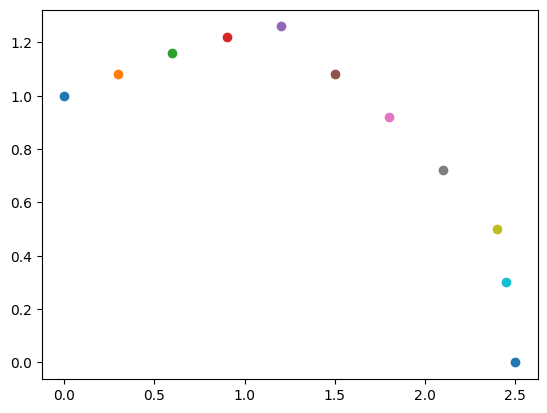

In [698]:
Ds = []
SS = []
for (D,_) in EDM_SET.keys():
    if _ == 't_b':
        plt.scatter(D,EDM_SET[D,_])
        Ds.append(D)
        SS.append(EDM_SET[D,_])
        print()
Ds = np.array(Ds)
SS = np.array(SS)
arg_Ds = np.argsort(Ds)[::-1]
SS = SS[arg_Ds]
Ds = Ds[arg_Ds]
print(SS)
print(Ds)

In [627]:
SS

array([0.72, 0.92, 1.08, 1.26, 1.22, 1.16, 1.08, 1.  ])

(0.0, 3.0)

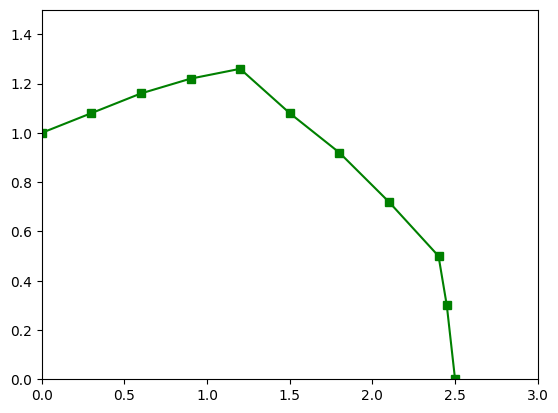

In [697]:
plt.plot(Ds,SS,'gs-')
plt.ylim(0,1.5)
plt.xlim(0,3)


In [699]:
np.savez('DATA/ER_threshold',Ds=Ds,bs = SS)
